# 5.3 독립변수가 여럿인 모델

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

5.3.1 분석 준비

In [2]:
sales = pd.read_csv("../../data/5-3-1-lm-model.csv")
print(sales.head(3))

   humidity  price  sales  temperature weather
0      29.5    290  229.7         17.8   rainy
1      38.1    290  206.1         26.1   rainy
2      31.5    290  202.5         22.0   rainy


5.3.2 데이터로 그래프 그리기

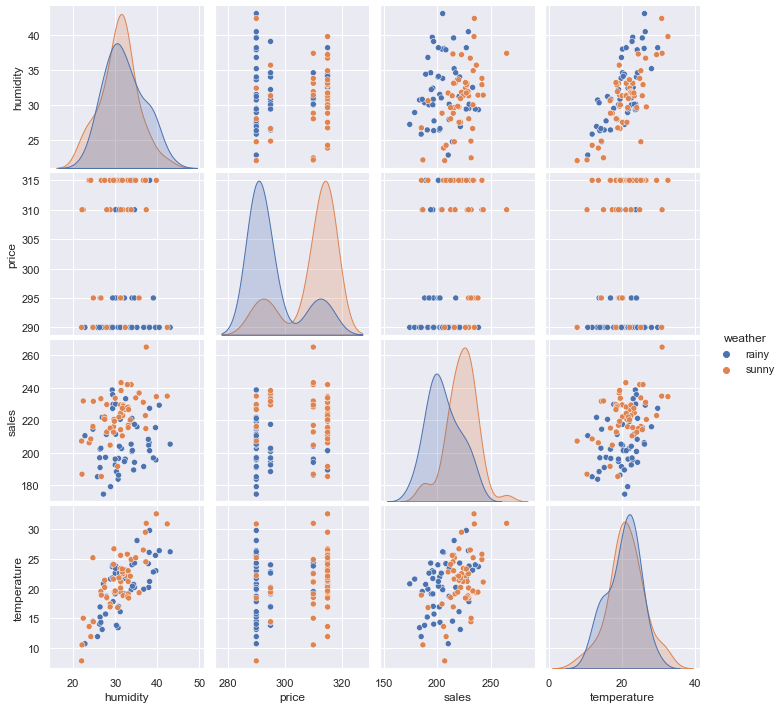

In [3]:
sns.pairplot(data=sales, hue="weather")

5.3.3 나쁜 분석 예: 변수가 1개인 모델 만들기

In [4]:
lm_dame = smf.ols("sales ~ price", sales).fit()
print(lm_dame.params)

Intercept    113.645406
price          0.332812
dtype: float64


In [5]:
print(sm.stats.anova_lm(lm_dame, typ=2))

                sum_sq    df         F    PR(>F)
price      1398.392322   1.0  4.970685  0.028064
Residual  27570.133578  98.0       NaN       NaN


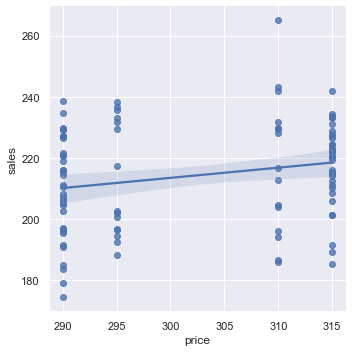

In [6]:
sns.lmplot(x="price", y="sales", data=sales)

5.3.4 독립변수 간의 관계 조사하기

In [7]:
print(sales.groupby("weather").mean())

         humidity  price    sales  temperature
weather                                       
rainy      32.126  295.5  205.924       20.422
sunny      30.852  309.5  222.718       21.102


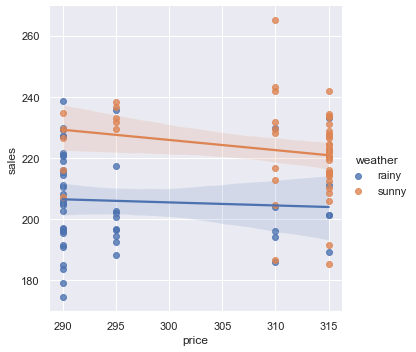

In [8]:
sns.lmplot(x="price", y="sales", data=sales, hue="weather")

5.3.5 복수의 독립변수를 가지는 모델

In [9]:
lm_sales = smf.ols("sales ~ weather + humidity + temperature + price", data=sales).fit()
print(lm_sales.params)

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64


5.3.6 나쁜 분석 예: 일반적인 분산분석으로 검정하기

In [15]:
lm_sales = smf.ols("sales ~ weather + humidity + temperature + price", data=sales).fit()
print(sm.stats.anova_lm(lm_sales, typ=1).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  38.848   0.000
humidity      1.0   1779.601  1779.601   9.805   0.002
temperature   1.0   2076.845  2076.845  11.443   0.001
price         1.0    818.402   818.402   4.509   0.036
Residual     95.0  17242.717   181.502     NaN     NaN


In [16]:
lm_sales_2 = smf.ols("sales ~ weather + temperature + humidity + price", data=sales).fit()
print(sm.stats.anova_lm(lm_sales_2, typ=1).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  38.848   0.000
temperature   1.0   3814.779  3814.779  21.018   0.000
humidity      1.0     41.667    41.667   0.230   0.633
price         1.0    818.402   818.402   4.509   0.036
Residual     95.0  17242.717   181.502     NaN     NaN


5.3.7 회귀계수의 t검정

In [18]:
print(lm_sales.summary().tables[1])

                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          278.6277     46.335      6.013      0.000     186.641     370.615
weather[T.sunny]    19.9891      3.522      5.675      0.000      12.997      26.982
humidity            -0.2541      0.456     -0.558      0.578      -1.159       0.651
temperature          1.6031      0.443      3.620      0.000       0.724       2.482
price               -0.3292      0.155     -2.123      0.036      -0.637      -0.021


In [20]:
print(lm_sales_2.summary().tables[1])

                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          278.6277     46.335      6.013      0.000     186.641     370.615
weather[T.sunny]    19.9891      3.522      5.675      0.000      12.997      26.982
temperature          1.6031      0.443      3.620      0.000       0.724       2.482
humidity            -0.2541      0.456     -0.558      0.578      -1.159       0.651
price               -0.3292      0.155     -2.123      0.036      -0.637      -0.021


5.3.8 Type II ANOVA

5.3.9 모델 선택과 분산분석

In [21]:
mod_null = smf.ols("sales ~ 1", sales).fit()
resid_sq_null = np.sum(mod_null.resid ** 2)
print(resid_sq_null)

28968.525899999993


In [22]:
mod_1 = smf.ols("sales ~ weather", sales).fit()
resid_sq_1 = np.sum(mod_1.resid ** 2)
print(resid_sq_1)

21917.565


In [25]:
print(f"{resid_sq_null - resid_sq_1}")

7050.960899999995


In [26]:
print(sm.stats.anova_lm(mod_1).round(3))

            df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  31.527     0.0
Residual  98.0  21917.565   223.649     NaN     NaN


In [28]:
mod_2 = smf.ols("sales ~ weather + humidity", sales).fit()
resid_sq_2 = np.sum(mod_2.resid ** 2)
print(resid_sq_2)

20137.963897851758


In [29]:
print(resid_sq_1 - resid_sq_2)

1779.601102148241


In [30]:
print(sm.stats.anova_lm(mod_2).round(3))

            df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  33.963   0.000
humidity   1.0   1779.601  1779.601   8.572   0.004
Residual  97.0  20137.964   207.608     NaN     NaN


In [31]:
mod_2_2 = smf.ols("sales ~ weather + temperature", sales).fit()
resid_sq_2_2 = np.sum(mod_2_2.resid ** 2)
print(resid_sq_2_2)

18102.786426712224


In [33]:
mod_3_2 = smf.ols("sales ~ weather + temperature + humidity", sales).fit()
resid_sq_3_2 = np.sum(mod_3_2.resid ** 2)
print(resid_sq_3_2)

18061.11936158843


In [34]:
print(f"{resid_sq_2_2 - resid_sq_3_2}")

41.6670651237946


In [35]:
print(sm.stats.anova_lm(mod_3_2).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  37.478   0.000
temperature   1.0   3814.779  3814.779  20.277   0.000
humidity      1.0     41.667    41.667   0.221   0.639
Residual     96.0  18061.119   188.137     NaN     NaN


5.3.10 Type II ANOVA와 수정제곱합

5.3.11 Type II ANOVA (실습)

In [38]:
mod_full = smf.ols("sales ~ weather + humidity + temperature + price", sales).fit()
resid_sq_full = np.sum(mod_full.resid ** 2)
print(resid_sq_full)

17242.716942366485


In [39]:
mod_non_humi = smf.ols("sales ~ weather + temperature + price", sales).fit()
resid_sq_non_humi = np.sum(mod_non_humi.resid ** 2)
print(resid_sq_non_humi)

17299.142016107657


In [40]:
print(f"{resid_sq_non_humi - resid_sq_full}")

56.42507374117122


In [41]:
print(sm.stats.anova_lm(mod_full, typ=2).round(3))

                sum_sq    df       F  PR(>F)
weather       5845.878   1.0  32.208   0.000
humidity        56.425   1.0   0.311   0.578
temperature   2378.017   1.0  13.102   0.000
price          818.402   1.0   4.509   0.036
Residual     17242.717  95.0     NaN     NaN


In [46]:
f_ratio, p_value, dof = mod_full.compare_f_test(mod_non_humi)
print(f"F비: {f_ratio:.3f}, p-value: {p_value:.3f}, 자유도: {dof}")

F비: 0.311, p-value: 0.578, 자유도: 1.0


5.3.12 Type II ANOVA의 해석

5.3.13 변수 선택과 모델 해석

In [47]:
print(sm.stats.anova_lm(mod_non_humi, typ=2).round(3))

                sum_sq    df       F  PR(>F)
weather       6354.966   1.0  35.266   0.000
temperature   4254.736   1.0  23.611   0.000
price          803.644   1.0   4.460   0.037
Residual     17299.142  96.0     NaN     NaN


In [48]:
print(mod_non_humi.params)

Intercept           273.301800
weather[T.sunny]     20.393871
temperature           1.417860
price                -0.326001
dtype: float64


5.3.14 AIC를 이용한 변수 선택

참고문헌: 

[1] 파이썬으로 배우는 통계학 교과서; 바바 신야 지음, 윤옹식 옮김; 한빛미디어 (2020)